In [2]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\dhitt\anaconda3\envs\leaf_39\lib\site-packages\keras\preprocessing\image\__init__.py)

## 1. Loading data and preprocessing it

In [ ]:
# checking directory
import os
print(os.getcwd())

c:\Users\Javi\Desktop\CSE 120\Anomaly Detection\Leaf-Classification\data\tomato


In [ ]:
train_data_dir = 'train' #'data/tomato/train' does not work

# Check if the directory exists
if not os.path.exists(train_data_dir):
    print(f"The directory {train_data_dir} does not exist.")
else:
    print(f"Found directory {train_data_dir}. Proceeding with loading data...")
    # Proceed with your data loading and model training

Found directory train. Proceeding with loading data...


In [ ]:
# loading the pictures of tomatoes

train_data_dir = './new_dataset/train_output'
test_data_dir = './new_dataset/val_output' #this folder will be used for evaluating model's perfomance

In [ ]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [ ]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [ ]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [ ]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 1000 images belonging to 10 classes.


## 1a. Building a CNN model with a learning rate of 0.0001

In [ ]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Before training the model, let's define an Early Stopping to avoid oferfitting.

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [ ]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    # steps_per_epoch = 7000/32,
                    epochs = 100,
                    # validation_steps = 3000/32,
                    validation_data = val_gen)  

Epoch 1/100
219/219 [==============================] - 101s 460ms/step - loss: 2.2546 - accuracy: 0.1553 - val_loss: 2.1129 - val_accuracy: 0.2617
Epoch 2/100
219/219 [==============================] - 97s 441ms/step - loss: 1.9208 - accuracy: 0.2939 - val_loss: 1.7480 - val_accuracy: 0.3893
Epoch 3/100
219/219 [==============================] - 94s 427ms/step - loss: 1.5954 - accuracy: 0.4359 - val_loss: 1.4746 - val_accuracy: 0.4870
Epoch 4/100
219/219 [==============================] - 93s 426ms/step - loss: 1.3559 - accuracy: 0.5290 - val_loss: 1.2476 - val_accuracy: 0.5737
Epoch 5/100
219/219 [==============================] - 89s 407ms/step - loss: 1.1620 - accuracy: 0.5943 - val_loss: 1.1613 - val_accuracy: 0.5863
Epoch 6/100
219/219 [==============================] - 97s 441ms/step - loss: 1.0585 - accuracy: 0.6270 - val_loss: 1.0370 - val_accuracy: 0.6420
Epoch 7/100
219/219 [==============================] - 88s 402ms/step - loss: 0.9498 - accuracy: 0.6719 - val_loss: 0.9370 

In [ ]:
scores = cnn.evaluate(test_gen)

32/32 [==============================] - 8s 258ms/step - loss: 0.3705 - accuracy: 0.8930


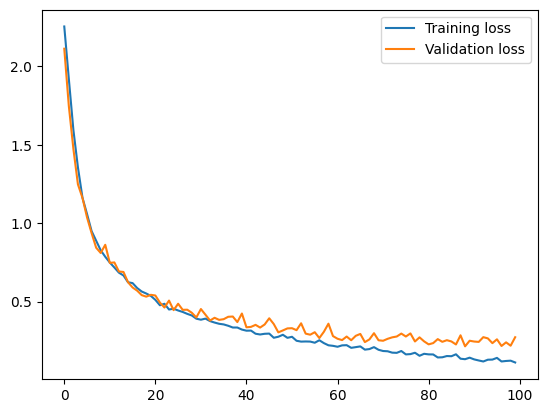

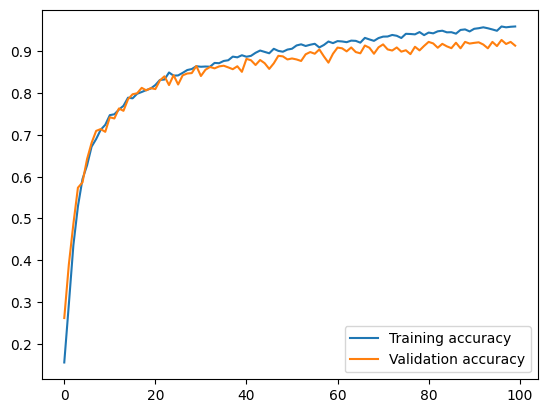

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
# don't forget to save your model for later
cnn.save('rembg_training.h5')

Making predictions, confusion matrix, metrics.

In [ ]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

C:\Users\Javi\AppData\Local\Temp\ipykernel_104368\2245222372.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [ ]:
# Predict classes
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

32/32 [==============================] - 8s 249ms/step


In [ ]:
predictions[1]

array([9.7573584e-01, 1.2912551e-02, 7.0073782e-03, 5.9463020e-04,
       3.8718867e-06, 2.8114701e-03, 5.5474334e-04, 3.7960583e-04,
       1.7477698e-13, 4.4337426e-11], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions,axis=1)

In [ ]:
# Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [ ]:
# Print confusion matrix
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[93  3  1  0  0  0  1  2  0  0]
 [ 1 80  8  1  1  1  4  4  0  0]
 [ 1  2 93  1  1  0  0  2  0  0]
 [ 0  1  5 83  5  2  0  3  0  1]
 [ 1  3  6  1 85  1  2  0  1  0]
 [ 0  0  2  0  0 91  6  0  1  0]
 [ 1  3  1  0  1  4 89  0  0  1]
 [ 3  0  0  0  0  0  0 97  0  0]
 [ 0  1  0  0  1  0  0  0 98  0]
 [ 0  0  1  0  2  0  7  0  0 90]]


In [ ]:
# To check F1 score, recall etc.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.93      0.93      0.93       100
                        Tomato___Early_blight       0.86      0.80      0.83       100
                         Tomato___Late_blight       0.79      0.93      0.86       100
                           Tomato___Leaf_Mold       0.97      0.83      0.89       100
                  Tomato___Septoria_leaf_spot       0.89      0.85      0.87       100
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.91      0.91       100
                         Tomato___Target_Spot       0.82      0.89      0.85       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.90      0.97      0.93       100
                 Tomato___Tomato_mosaic_virus       0.98      0.98      0.98       100
                             Tomato___healthy       0.98      0.90      0.94       100

                                     accu